In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
#loading the csv data to a Padas Dataframe
stress_data=pd.read_csv('mental_stress_dataset_500.csv')

In [7]:
stress_data.head()

,Sleep Hours,Workload (1-10),Screen Time (hrs),Caffeine Intake (cups),Exercise (1=Yes),Meditation (1=Yes),Stress Score
0,8.1,10,9.9,4,0,1,100
1,6.2,6,1.8,5,1,0,91
2,8.1,8,2.2,2,1,0,82
3,5.6,9,11.6,2,1,1,100
4,5.6,10,4.0,1,0,1,100


In [8]:
# print last 5 rows of the dataset
stress_data.tail()

,Sleep Hours,Workload (1-10),Screen Time (hrs),Caffeine Intake (cups),Exercise (1=Yes),Meditation (1=Yes),Stress Score
495,6.9,4,4.9,5,1,1,79
496,7.7,6,5.1,4,1,1,80
497,8.1,8,1.6,5,0,1,89
498,8.3,9,2.3,5,1,1,82
499,5.5,3,2.5,1,1,1,70


In [9]:
# number of rows and columns in the dataset
stress_data.shape

(500, 7)

In [10]:
# getting some info about the data
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep Hours             500 non-null    float64
 1   Workload (1-10)         500 non-null    int64  
 2   Screen Time (hrs)       500 non-null    float64
 3   Caffeine Intake (cups)  500 non-null    int64  
 4   Exercise (1=Yes)        500 non-null    int64  
 5   Meditation (1=Yes)      500 non-null    int64  
 6   Stress Score            500 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 27.5 KB


In [11]:
# checking for missing values
stress_data.isnull().sum()

Sleep Hours               0
Workload (1-10)           0
Screen Time (hrs)         0
Caffeine Intake (cups)    0
Exercise (1=Yes)          0
Meditation (1=Yes)        0
Stress Score              0
dtype: int64

In [12]:
# statistical measures about the data
stress_data.describe()

,Sleep Hours,Workload (1-10),Screen Time (hrs),Caffeine Intake (cups),Exercise (1=Yes),Meditation (1=Yes),Stress Score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.882400,5.496000,6.296200,2.750000,0.528000,0.538000,91.110000
std,1.833787,2.862581,3.186087,1.673649,0.499715,0.499053,10.737247
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,52.000000
25%,4.200000,3.000000,3.600000,1.000000,0.000000,0.000000,85.000000
50%,5.800000,5.000000,6.050000,3.000000,1.000000,1.000000,95.000000
75%,7.500000,8.000000,8.925000,4.000000,1.000000,1.000000,100.000000
max,9.000000,10.000000,12.000000,5.000000,1.000000,1.000000,100.000000


In [13]:
# checking the distribution of Target Variable
stress_data['Stress Score'].value_counts()

Stress Score
100    194
98      16
94      16
89      15
93      15
96      15
86      15
85      14
92      14
97      13
81      11
95      11
99      11
84      10
88      10
90       9
83       9
87       9
82       8
77       7
76       7
78       7
72       6
70       6
91       5
74       5
67       4
71       4
79       4
64       4
80       3
73       3
66       3
69       3
63       3
68       2
58       1
62       1
61       1
55       1
52       1
75       1
57       1
60       1
56       1
Name: count, dtype: int64

In [14]:
correlation=stress_data.corr()
correlation

,Sleep Hours,Workload (1-10),Screen Time (hrs),Caffeine Intake (cups),Exercise (1=Yes),Meditation (1=Yes),Stress Score
Sleep Hours,1.000000,0.028848,-0.044327,0.002351,0.004913,-0.057297,-0.500470
Workload (1-10),0.028848,1.000000,-0.016844,0.012549,-0.061563,-0.039873,0.481550
Screen Time (hrs),-0.044327,-0.016844,1.000000,0.006436,-0.040022,-0.027952,0.392732
Caffeine Intake (cups),0.002351,0.012549,0.006436,1.000000,0.009585,-0.020994,0.188548
Exercise (1=Yes),0.004913,-0.061563,-0.040022,0.009585,1.000000,0.039922,-0.332425
Meditation (1=Yes),-0.057297,-0.039873,-0.027952,-0.020994,0.039922,1.000000,-0.231720
Stress Score,-0.500470,0.481550,0.392732,0.188548,-0.332425,-0.231720,1.000000


<Axes: >

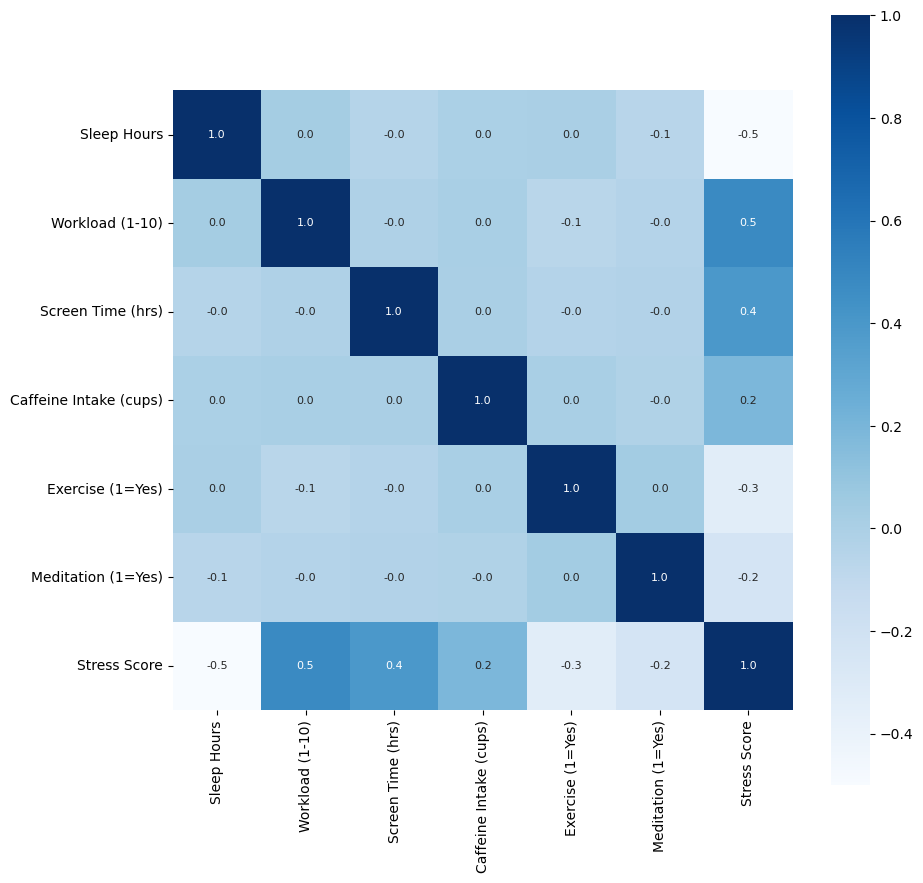

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
stress_data.columns 

Index(['Sleep Hours', 'Workload (1-10)', 'Screen Time (hrs)',
       'Caffeine Intake (cups)', 'Exercise (1=Yes)', 'Meditation (1=Yes)',
       'Stress Score'],
      dtype='object')

In [17]:
x = stress_data.drop(['Sleep Hours','Screen Time (hrs)','Exercise (1=Yes)','Meditation (1=Yes)'],axis=1)
y = stress_data['Stress Score']

In [18]:
x

,Workload (1-10),Caffeine Intake (cups),Stress Score
0,10,4,100
1,6,5,91
2,8,2,82
3,9,2,100
4,10,1,100
...,...,...,...
495,4,5,79
496,6,4,80
497,8,5,89
498,9,5,82


In [19]:
y

0      100
1       91
2       82
3      100
4      100
      ... 
495     79
496     80
497     89
498     82
499     70
Name: Stress Score, Length: 500, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(500, 3) (400, 3) (100, 3)


In [22]:
print(y.shape,y_train.shape,y_test.shape)

(500,) (400,) (100,)


In [23]:
# training the LinearRegression model with Training data
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)
y_pred

array([100., 100.,  81.,  87., 100., 100.,  67.,  64.,  89.,  83.,  70.,
        68.,  89., 100.,  76.,  86.,  79., 100.,  89.,  89.,  70.,  91.,
       100.,  97., 100., 100.,  89.,  73.,  95., 100., 100., 100.,  62.,
       100.,  82.,  90., 100.,  89.,  97.,  71., 100.,  74.,  72., 100.,
        81.,  99., 100.,  83.,  58.,  94.,  66., 100.,  96.,  85.,  85.,
       100., 100.,  92.,  98.,  98., 100., 100., 100., 100., 100.,  66.,
        92., 100.,  52.,  69., 100.,  74., 100., 100., 100.,  98.,  81.,
        96.,  86., 100.,  98.,  94., 100., 100., 100.,  95.,  87., 100.,
        84.,  85., 100.,  85.,  93.,  89., 100.,  70.,  90.,  90., 100.,
        98.])

In [25]:
y_test

361    100
73     100
374     81
155     87
104    100
      ... 
347     70
86      90
75      90
438    100
15      98
Name: Stress Score, Length: 100, dtype: int64

In [26]:
y_train

249     98
433     95
19     100
322    100
332     94
      ... 
106     70
270    100
348     78
435     90
102     92
Name: Stress Score, Length: 400, dtype: int64

In [27]:
x_train

,Workload (1-10),Caffeine Intake (cups),Stress Score
249,8,4,98
433,6,2,95
19,2,5,100
322,4,4,100
332,4,5,94
...,...,...,...
106,1,4,70
270,10,4,100
348,2,1,78
435,3,4,90


In [28]:
x_test

,Workload (1-10),Caffeine Intake (cups),Stress Score
361,7,5,100
73,7,4,100
374,5,4,81
155,10,1,87
104,5,2,100
...,...,...,...
347,1,2,70
86,3,4,90
75,8,4,90
438,6,4,100


In [29]:
ypre=model.predict(x_test)
print(ypre)


[100. 100.  81.  87. 100. 100.  67.  64.  89.  83.  70.  68.  89. 100.
  76.  86.  79. 100.  89.  89.  70.  91. 100.  97. 100. 100.  89.  73.
  95. 100. 100. 100.  62. 100.  82.  90. 100.  89.  97.  71. 100.  74.
  72. 100.  81.  99. 100.  83.  58.  94.  66. 100.  96.  85.  85. 100.
 100.  92.  98.  98. 100. 100. 100. 100. 100.  66.  92. 100.  52.  69.
 100.  74. 100. 100. 100.  98.  81.  96.  86. 100.  98.  94. 100. 100.
 100.  95.  87. 100.  84.  85. 100.  85.  93.  89. 100.  70.  90.  90.
 100.  98.]


In [33]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, ypre)
rmse = np.sqrt(mean_squared_error(y_test, ypre))
mae = mean_absolute_error(y_test, ypre)

print(" Accuracy Metrics")
print(f"🔸 R² Score           : {r2:.4f}")
print(f"🔸 RMSE               : {rmse:.2f}")
print(f"🔸 Mean squared error : {mae:.2f}")

 Accuracy Metrics
🔸 R² Score           : 1.0000
🔸 RMSE               : 0.00
🔸 Mean squared error : 0.00
